
# 2 Proyecto Machine Learning


Juan Pablo Abril Serna

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/MachineLearning/diabetes.xlsx'

In [ ]:
df_diabetes = pd.read_excel(file_path)

In [ ]:
print(df_diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               772 non-null    int64  
 1   Glucose                   764 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             772 non-null    int64  
 4   Insulin                   772 non-null    int64  
 5   BMI                       735 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       772 non-null    int64  
 8   Outcome                   772 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.4 KB
None


In [ ]:
df_diabetes = df_diabetes.drop_duplicates()

In [ ]:
valores_nulos = df_diabetes.isnull().sum()
print(valores_nulos)

Pregnancies                  0
Glucose                      8
BloodPressure                4
SkinThickness                0
Insulin                      0
BMI                         37
DiabetesPedigreeFunction    28
Age                          0
Outcome                      0
dtype: int64


Para los valores nulos los llenare con la Mediana,

¿Por qué?

Para glucosa, como es un valor es numérico y puede tener valores extremos altos o bajos debido a condiciones de salud.

Para la presión arterial, al ser un valor numérico también puede tener outliers extremos por condiciones externas como hipertensión, etc.

Para Índice de Masa Corporal, pueden tener una distribución sesgada si hay personas con sobrepeso extremo por ende el promedio se verá afectado.

Para función de diabetes, evalúa el riesgo de diabetes con base en antecedentes familiares al ser un valor continuo, los outliers podrían distorsionar el promedio.

In [ ]:
df_diabetes['Glucose'].fillna(df_diabetes['Glucose'].median(), inplace=True)
df_diabetes['BloodPressure'].fillna(df_diabetes['BloodPressure'].median(), inplace=True)
df_diabetes['BMI'].fillna(df_diabetes['BMI'].median(), inplace=True)
df_diabetes['DiabetesPedigreeFunction'].fillna(df_diabetes['DiabetesPedigreeFunction'].median(), inplace=True)

In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 770
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 60.0 KB


Variables que deben estandarizarse:

Glucose: Es un valor continuo que varía en un rango amplio

BloodPressure:  Es un valor continuo con un rango amplio.

SkinThickness: Es un valor continuo.

Insulin: Los valores de insulina pueden variar ampliamente

BMI: Es un valor continuo con un rango amplio.

DiabetesPedigreeFunction:  Es una función numérica que también varía en diferentes escalas.



In [ ]:
scaler = StandardScaler()
columnas_a_estandarizar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
df_diabetes[columnas_a_estandarizar] = scaler.fit_transform(df_diabetes[columnas_a_estandarizar])
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.852372,0.148559,0.907270,-0.692891,0.211211,0.500759,50,1
1,1,-1.133049,-0.162040,0.530902,-0.692891,-0.700668,-0.350661,31,0
2,8,1.955384,-0.265573,-1.288212,-0.692891,-1.130554,0.639577,32,1
3,1,-1.006991,-0.162040,0.154533,0.123302,-0.505265,-0.918274,21,0
4,0,0.505711,-1.507971,0.907270,0.765836,1.448762,5.624702,33,1


Medida de posición

In [ ]:
medidas_posicion = df_diabetes.describe().loc[['mean', '50%', 'min', 'max']]
medidas_posicion.rename(index={'50%': 'median'}, inplace=True)
print(medidas_posicion)


        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
mean       3.845052  6.938894e-18   2.521131e-16   1.006140e-16 -3.006854e-17   
median     3.000000 -1.245812e-01   1.485593e-01   1.545332e-01 -4.280622e-01   
min        0.000000 -3.811792e+00  -3.578633e+00  -1.288212e+00 -6.928906e-01   
max       17.000000  2.459618e+00   2.736888e+00   4.921866e+00  6.652839e+00   

                 BMI  DiabetesPedigreeFunction        Age   Outcome  
mean    2.289835e-16             -5.088522e-17  33.240885  0.348958  
median  2.781775e-03             -3.013035e-01  29.000000  0.000000  
min    -4.165810e+00             -1.192826e+00  21.000000  0.000000  
max     4.575206e+00              6.031902e+00  81.000000  1.000000  


Medidas de dispersión

In [ ]:
medidas_dispersión = df_diabetes.describe().loc[['std', 'min', 'max']]
iqr = df_diabetes.quantile(0.75) - df_diabetes.quantile(0.25)
medidas_dispersión.loc['IQR'] = iqr
medidas_dispersión.loc['range'] = medidas_dispersión.loc['max'] - medidas_dispersión.loc['min']
print(medidas_dispersión)


       Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
std       3.369578  1.000652       1.000652       1.000652  1.000652   
min       0.000000 -3.811792      -3.578633      -1.288212 -0.692891   
max      17.000000  2.459618       2.736888       4.921866  6.652839   
IQR       5.000000  1.268464       0.828265       2.007298  1.104899   
range    17.000000  6.271410       6.315521       6.210078  7.345730   

            BMI  DiabetesPedigreeFunction        Age   Outcome  
std    1.000652                  1.000652  11.760232  0.476951  
min   -4.165810                 -1.192826  21.000000  0.000000  
max    4.575206                  6.031902  81.000000  1.000000  
IQR    1.146363                  1.093581  17.000000  1.000000  
range  8.741016                  7.224729  60.000000  1.000000  


Gráficos

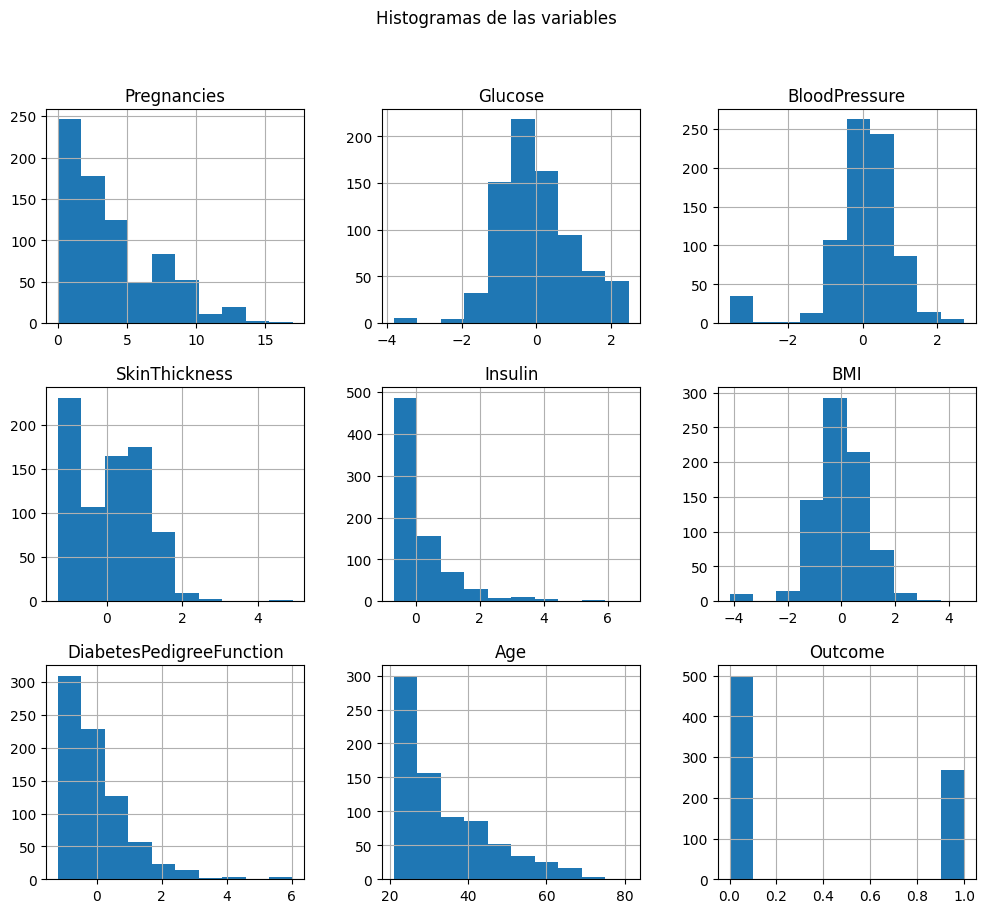

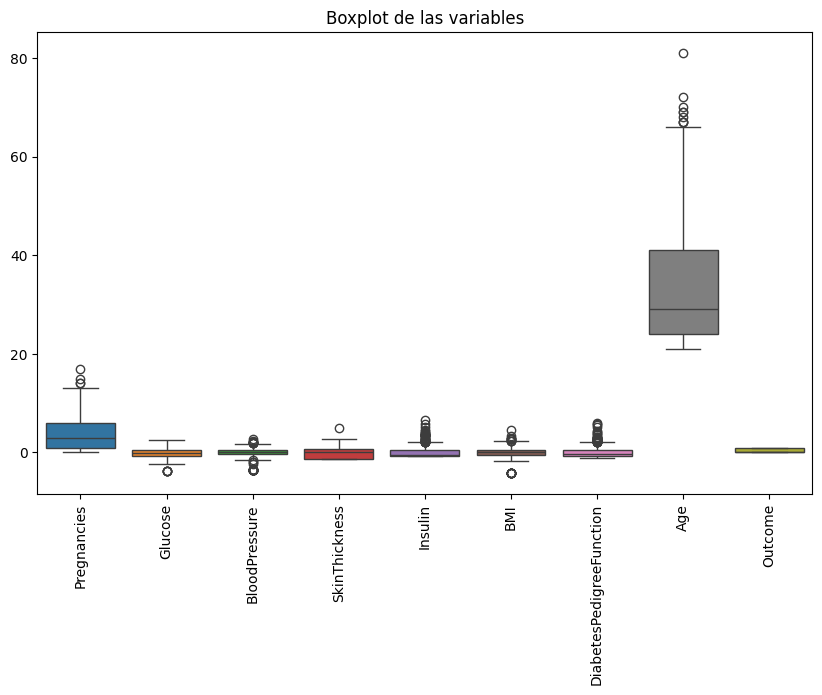

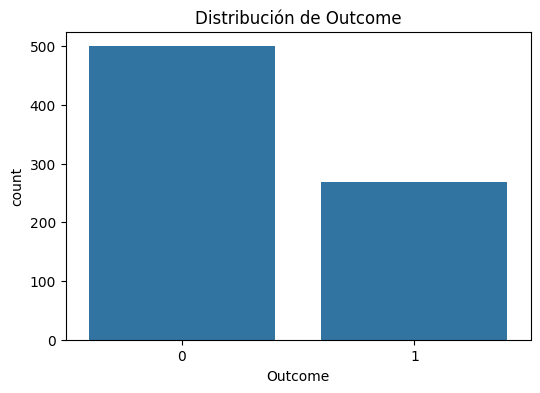

In [ ]:
df_diabetes.hist(figsize=(12, 10))
plt.suptitle('Histogramas de las variables')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes)
plt.title('Boxplot de las variables')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_diabetes)
plt.title('Distribución de Outcome')
plt.show()


Outliers

In [ ]:
def encontrar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
    return outliers

outliers_dict = {col: encontrar_outliers(df_diabetes, col) for col in columnas_a_estandarizar}

for col, outliers in outliers_dict.items():
    print(f'Columna {col}: {len(outliers)} outliers')


Columna Glucose: 5 outliers
Columna BloodPressure: 49 outliers
Columna SkinThickness: 1 outliers
Columna Insulin: 34 outliers
Columna BMI: 21 outliers
Columna DiabetesPedigreeFunction: 36 outliers


# Visualizaciones efectivas

Visualización de puntos para identificar la relación

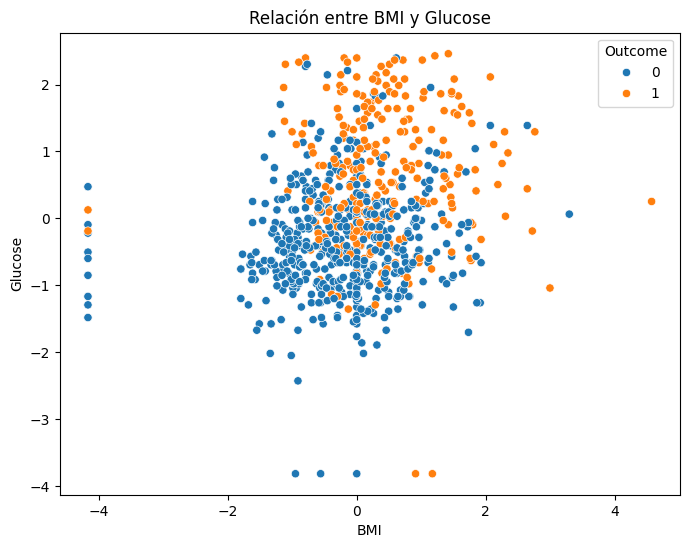

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df_diabetes)
plt.title('Relación entre BMI y Glucose')
plt.show()

Mapa de calor

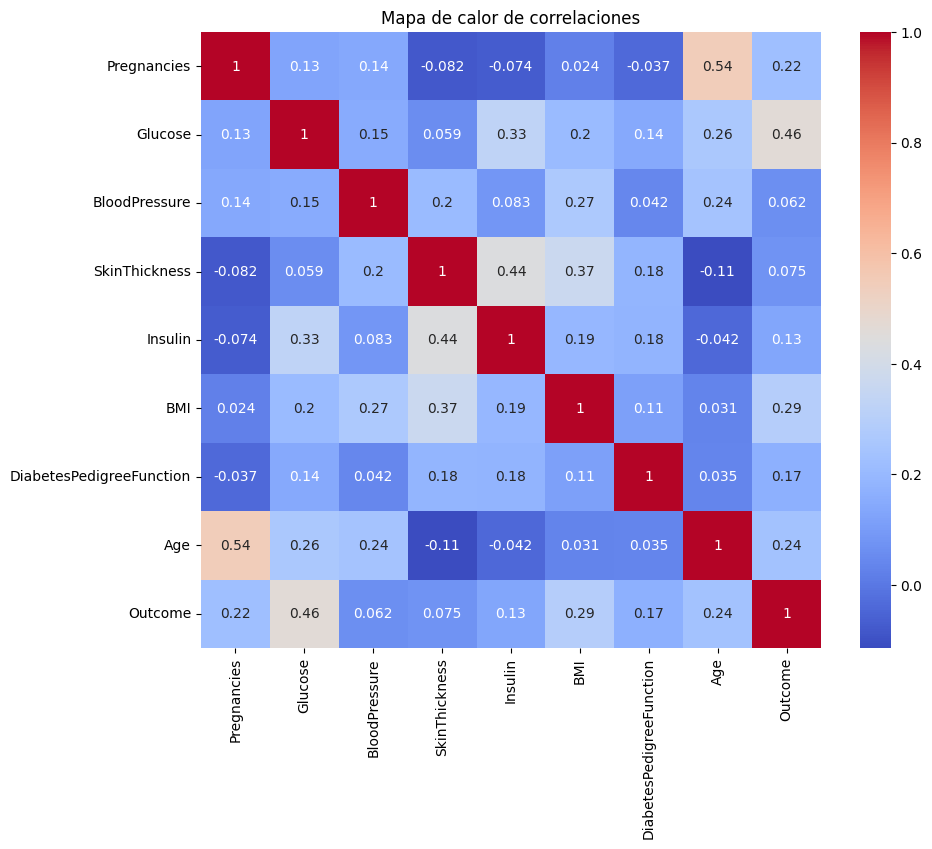

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_diabetes.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

# Análisis

Medidas de posición:
*   Embarazo: La media es 3.84, lo que indica que en promedio las mujeres de este análisis tienen alrededor de 4 embarazos, la mediana es un poco menor (3), lo que indica una distribución sesgada a la derecha, posiblemente debido a la presencia de algunos valores atipicos (un valor maximo de 17)
*   Glucosa: la media es prácticamente cero debido a la estandarización de los datos, la mediana (-0.124) y el rango de valores nos muestran que los niveles de glucosa varían bastante entre los individuos, esto es esperado en personas con diabetes
*   Presión arterial: Tanto la media como la mediana son cercanas a cero, lo que refleja que tras la estandarización, la distribución de la presión arterial está centrada alrededor de la media.
*   Índice de masa corporal: La media y mediana están también cerca de cero debido a la estandarización, pero el rango es considerable, con valores mínimos y máximos amplios.





Medidas de disperción:



*   Glucosa y Presión arterial: ambas tienen una desviación estándar de 1, lo cual es esperado ya que se realizó la estandarización, pero hay una gran variación en los niveles de glucosa y presión arterial entre los pacientes.

*   Insulina: tiene un rango muy amplio, de 7.35, lo que indica una variabilidad alta en los niveles de insulina, se puede deber a que esta relacionado con diferentes tipos de tratamiento o grado de la enfermedad.

*   Edad: tiene una desviación amplia de 11.76, lo que indica que la edad de los pacientes también es un factor de dispersión significativo.




Outliers:

*   Presión arterial:  se encontraron 49 outliers, esta gran cantidad de outliers puede ser debido a errores de medición o alguna condición atipica para algunos pacientes


*   Insulina: tiene 34 outliers, puede ser por la diferencia de tratamientos o diferente grado de la enfermedad

*   Indice de masa corporal: presenta 21 outliers, esto se debe principalmente a que pueden ser pacientes con obesidad o pacientes que presentan desnutrición





Relación entre las variables:



*   Glucosa y Outcome (presencia de diabetes): tiene una correlación moderada, de unos 0.46, lo que indica que los niveles de glucosa estan relacionados con la presencia o la ausencia de diabetes

*   Edad y embarazos: es muy logico sin embargo no hay que pasarla desapercibida, entre mayor sea la persona más embarazos puede haber tenido

*   Indice de masa corporal y grosor de la piel (SkinThickness): tiene una correlación de 0.37 lo cual nos indica que entre más gruesa la piel existe mayor cantidad de grasa, por ende mayor indice de masa corporal.

*   Insulina y grosor de la piel (SkinThickness): se puede observar que tiene una correlación de 0.44, lo cual podemos concluir que puede ser un factor que genere algun tipo de resistencia a la insulina y por ende mayores niveles de esta podría presentar





# Modelo de Machine Learning:

Debido a una alta cantidad de outliers, no seria conveniente realizar un modelo predictivo, dado que puede alterar de manera significativa los resultados, dandonos así falsos positivos o falsos negativos, por lo cual se deberia recopilar una data con menos valores atipicos o verificar si dichos datos atipicos etan correctos, al igual de que se presenta menos del 50% de personas con diabetes, la data está muy reducida, lo cual tambien seria necesario ampliar dicha data para poder realizar un modelo predictivo